In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)


In [14]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    # "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    # "FingerMovements",
    # "Handwriting",
]

models = [
    "TSClassifier",
    "TSAREncoderDecoder",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    accuracy_score,
    base_path,
    datasets,
    models,
    pmisses,
    #func_params={"average": "macro"},
)


In [15]:
base_path = pathlib.Path("/usr/src/code/data/outputs/time_encoding")
results2, model_mean2, pmiss_result2 = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "macro"},
)
model_mean["CIFEnc"] = model_mean2["CanonicalIntervalForest"]

FileNotFoundError: No such file or directory (os error 2): /usr/src/code/data/outputs/time_encoding/TSClassifier_ERing_0.parquet

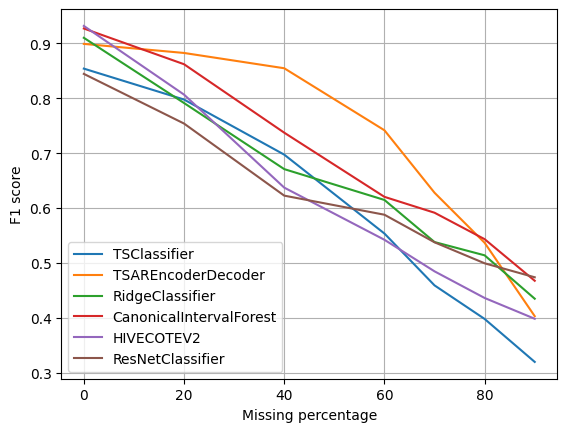

In [16]:
plot_metric(model_mean, metric="F1 score")


In [7]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 90
metric_name = "f1_score"

datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifier",
    "TSAREncoderDecoder",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

df = gather_metric_cd(f1_score, "f1_score", base_path, datasets, models, pmiss, func_params={"average": "macro"})
draw_cd_diagram(metric_name, df, title=f"Pmiss: {pmiss} - {metric_name}", labels=True)

['TSClassifier' 'TSAREncoderDecoder' 'RidgeClassifier'
 'CanonicalIntervalForest' 'HIVECOTEV2' 'ResNetClassifier']
the null hypothesis over the entire classifiers cannot be rejected
CanonicalIntervalForest    1.0
HIVECOTEV2                 0.0
ResNetClassifier           2.0
RidgeClassifier            1.0
TSAREncoderDecoder         3.0
TSClassifier               3.0
dtype: float64
HIVECOTEV2                 4.8
TSClassifier               4.0
CanonicalIntervalForest    3.4
RidgeClassifier            3.3
ResNetClassifier           3.1
TSAREncoderDecoder         2.4
dtype: float64
('HIVECOTEV2', 'TSAREncoderDecoder', 0.013671875, False)
('CanonicalIntervalForest', 'HIVECOTEV2', 0.01953125, False)
('HIVECOTEV2', 'RidgeClassifier', 0.02734375, False)
('RidgeClassifier', 'TSAREncoderDecoder', 0.083984375, False)
('TSAREncoderDecoder', 'TSClassifier', 0.083984375, False)
('HIVECOTEV2', 'ResNetClassifier', 0.10546875, False)
('CanonicalIntervalForest', 'TSAREncoderDecoder', 0.193359375, False)
